<a href="https://colab.research.google.com/github/SwanandKale/AIML_Bootcamp/blob/main/Twitter%20Sentiments_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Case Study Twitter Sentiments")

Case Study Twitter Sentiments


In [ ]:
from pandas.io.parsers.readers import read_csv
dataset='/content/drive/MyDrive/ALML DataSets/Tweets.csv'

import pandas as pd

df=pd.read_csv(dataset)

In [ ]:
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive
27480,ed167662a6,hlo all hi,hiii,positive


In [ ]:
df=df.drop(['text','textID'],axis=1)

In [ ]:
df.head()

,selected_text,sentiment
0,"I`d have responded, if I were going",1
1,Sooo SAD,0
2,bullying me,0
3,leave me alone,0
4,"Sons of ****,",0


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


df['sentiment']=encoder.fit_transform(df['sentiment'])
df.head(10)

,selected_text,sentiment
0,"I`d have responded, if I were going",1
1,Sooo SAD,0
2,bullying me,0
3,leave me alone,0
4,"Sons of ****,",0
5,http://www.dothebouncy.com/smf - some shameles...,1
6,fun,2
7,Soooo high,1
8,Both of you,1
9,Wow... u just became cooler.,2


In [ ]:
df.isnull().sum()

selected_text    1
sentiment        0
dtype: int64

In [ ]:
df['selected_text'].fillna('notext',inplace=True)

In [ ]:
df.isnull().sum()

selected_text    0
sentiment        0
dtype: int64

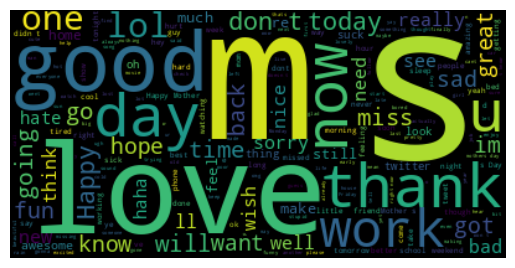

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud=WordCloud().generate(" ".join(df['selected_text']))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

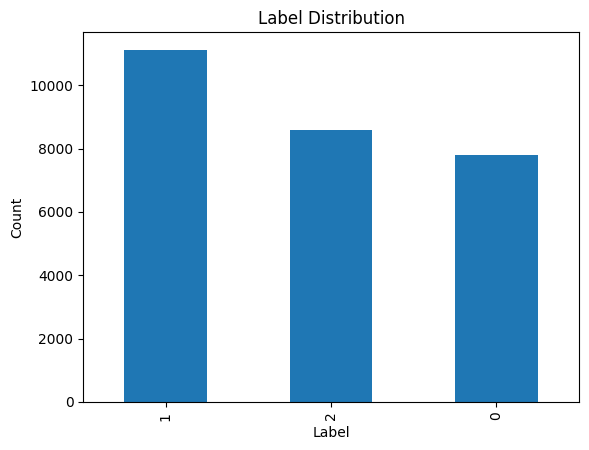

In [ ]:
label_counts=df['sentiment'].value_counts()
label_counts.plot(kind='bar')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')

#Display the plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df['selected_text'],df['sentiment'],test_size=0.2,random_state=42)

In [ ]:
X_train.isnull().sum()

0

In [ ]:
X_test.isnull().sum()

0

In [ ]:
import nltk
nltk.download(['punkt','wordnet'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus.reader.wordnet import WordNetCorpusReader
from nltk.corpus.reader import wordnet

In [ ]:
def tokenize_lemma(text):
  tokens=nltk.word_tokenize(text)

  lemm=nltk.WordNetLemmatizer()

  clean_tokens=[]

  for tok in tokens:
    tag=nltk.pos_tag([tok])[0][1][0]
    tag_dict={
        "J":wordnet.ADJ,
        "R":wordnet.ADV,
        "N":wordnet.NOUN,
        "V":wordnet.VERB
    }

    print(tag)
    tag_dict=tag_dict.get(tag,wordnet.NOUN)
    print(lemm.lemmatize(tok,tag_dict))
    clean_tokens.append(lemm.lemmatize(tok,tag_dict))

  return clean_tokens


In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
tokenize_lemma("caring")

V
care


['care']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect=CountVectorizer(tokenizer=tokenize_lemma)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf=TfidfTransformer()

In [ ]:
X_train_count= vect.fit_transform(X_train)
X_train_tfidf=tfidf.fit_transform(X_train_count)

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [ ]:
X_test_tfidf= tfidf.transform(vect.transform(X_test))
y_pred = svm.predict(X_test_tfidf)

In [ ]:
svm.score(tfidf.transform(vect.transform(df['selected_text'])),df['sentiment'])

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.8484627978897581
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1582
           1       0.81      0.90      0.85      2250
           2       0.91      0.82      0.87      1665

    accuracy                           0.85      5497
   macro avg       0.86      0.84      0.85      5497
weighted avg       0.85      0.85      0.85      5497



In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

def predict_sentiment(text):
    text_vectorized = vect.transform([text])
    sentiment = svm.predict(tfidf.transform(text_vectorized)[0])

    if sentiment==0:
      return "Negative"
    elif sentiment==1:
      return "Neutral"
    else:
      return "Positive"

  # Step 6: Create the Gradio interface
iface = gr.Interface(
    fn=predict_sentiment,
    inputs="text",
    outputs="text",
    title="Sentiment Analysis",
    description="Enter a text and predict its sentiment (neutral, positive, or negative)."
)

# Step 7: Launch the interface
iface.launch()



Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>